In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
import joblib

In [2]:
diamonds = pd.read_csv('diamonds_preprocessed.csv')
diamondsOG = pd.read_csv('diamonds_original.csv')

In [3]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,class,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,"(5000, 10000]",0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,"[0, 5000]",0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,"[0, 5000]",0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,"(5000, 10000]",0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,"[0, 5000]",0.066582
...,...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,"[0, 5000]",0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,"[0, 5000]",0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,"[0, 5000]",0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,"[0, 5000]",0.080874


In [4]:
diamondsOG

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.6,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.1,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.7,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.0,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.2,54.0,4.43,4.45,2.76,646.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.9,59.0,6.38,6.41,4.02,4796.0
53936,0.93,2,4,3,61.8,59.0,6.27,6.23,3.86,3750.0
53937,0.30,4,5,4,62.4,54.0,4.30,4.32,2.69,491.0
53938,0.36,3,2,4,61.5,55.0,4.60,4.57,2.82,807.0


In [5]:
price_classes = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
feature_names = diamonds.columns.to_list()
feature_names.remove('class')
feature_names

['carat', 'clarity', 'color', 'cut', 'depth', 'table', 'x', 'y', 'z', 'volume']

In [6]:
X = diamonds[feature_names]
y = diamonds['class']

In [7]:
X

,carat,clarity,color,cut,depth,table,x,y,z,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,0.066582
...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,0.080874


In [8]:
y

0        (5000, 10000]
1            [0, 5000]
2            [0, 5000]
3        (5000, 10000]
4            [0, 5000]
             ...      
52325        [0, 5000]
52326        [0, 5000]
52327        [0, 5000]
52328        [0, 5000]
52329        [0, 5000]
Name: class, Length: 52330, dtype: object

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
all_predictions = []
accuracy_scores = []

***

Pomocne funkcije za izvestaj o modelu

In [10]:
def to_num(y):
  temp = []
  temp_index = y.index
  for i in y:
    temp.append(class_to_num[i])
  return pd.Series(temp, index=temp_index, name='class')

def to_cat(y):
  temp = []
  temp_index = y.index
  for i in y:
    temp.append(num_to_class[i])
  return pd.Series(temp, index=temp_index, name='class')

def plot_learning_curve(pipeline, X_train, y_train):
  train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=3, random_state=42, train_sizes=np.linspace(0.1, 1.0, 10))

  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  plt.figure(figsize=(8, 6))
  plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Score')
  plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b')
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
  plt.xlabel('Training Set Size')
  plt.ylabel('Accuracy')
  plt.title('Learning Curve')
  plt.legend(loc='best')
  plt.grid(True)
  plt.show()

def feature_importance(pipeline):
  model = pipeline.named_steps['model']
  for i in range(len(feature_names)):
    print(f'{feature_names[i]} : {model.feature_importances_[i]}')

  plt.figure(figsize=(8,8))
  pd.Series(model.feature_importances_, index=feature_names).plot.barh(grid=True)
  plt.title('Znacajnost atributa')
  plt.show()

def model_report(pipeline, X_test, y_test):
  y_pred = pipeline.predict(X_test)
  y_pred = pd.Series(y_pred)
  y_pred = to_cat(y_pred)
  y_test = to_cat(y_test)
  model = pipeline['model']
  accuracy = accuracy_score(y_test, y_pred)
  all_predictions.append(y_pred)
  accuracy_scores.append(accuracy)

  print(f'Izvestaj o {type(model).__name__} modelu:')
  print('-------------------------------------------------------------------')
  print(f'Klase za predvidjanje: {price_classes}')
  print(f'Accuracy: {accuracy}')
  print('-------------------------------------------------------------------')
  print('Klasifikacioni izvestaj: ')
  print(classification_report(y_test, y_pred))
  print('-------------------------------------------------------------------')
  print('Matrica konfuzije: ')
  data = confusion_matrix(y_test, y_pred)
  _ = sns.heatmap(data, annot=True, fmt='g', xticklabels=model.classes_, yticklabels=model.classes_, cmap = plt.cm.Reds)



## XGBClassifier

Rucno cemo kodirati klasu da bi ostale smislene oznake jer enkoderi sortiraju stringove pa onda kodiraju

In [11]:
class_to_num = {'[0, 5000]' : 0, '(5000, 10000]' : 1, '(10000, 15000]' : 2, '15000+' : 3}
num_to_class =  {0 : '[0, 5000]', 1 : '(5000, 10000]', 2 : '(10000, 15000]', 3 :'15000+'}

In [12]:
xgb = Pipeline([
    ('model', XGBClassifier(random_state=42))
])

In [13]:
y_train = to_num(y_train)
y_test = to_num(y_test)

In [14]:
xgb.fit(X_train, y_train)

Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

Izvestaj o XGBClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.952863239696796
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.82      0.83      0.83      1018
 (5000, 10000]       0.89      0.89      0.89      2802
        15000+       0.82      0.83      0.82       409
     [0, 5000]       0.98      0.98      0.98     11470

      accuracy                           0.95     15699
     macro avg       0.88      0.88      0.88     15699
  weighted avg       0.95      0.95      0.95     15699

-------------------------------------------------------------------
Matrica konfuzije: 


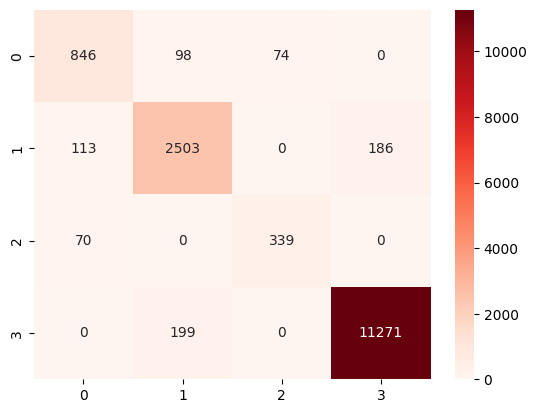

In [15]:
model_report(xgb, X_test, y_test)

carat : 0.2394111156463623
clarity : 0.12470827251672745
color : 0.09203235805034637
cut : 0.021751049906015396
depth : 0.011700458824634552
table : 0.010892332531511784
x : 0.02076100744307041
y : 0.20866620540618896
z : 0.02736577019095421
volume : 0.24271149933338165


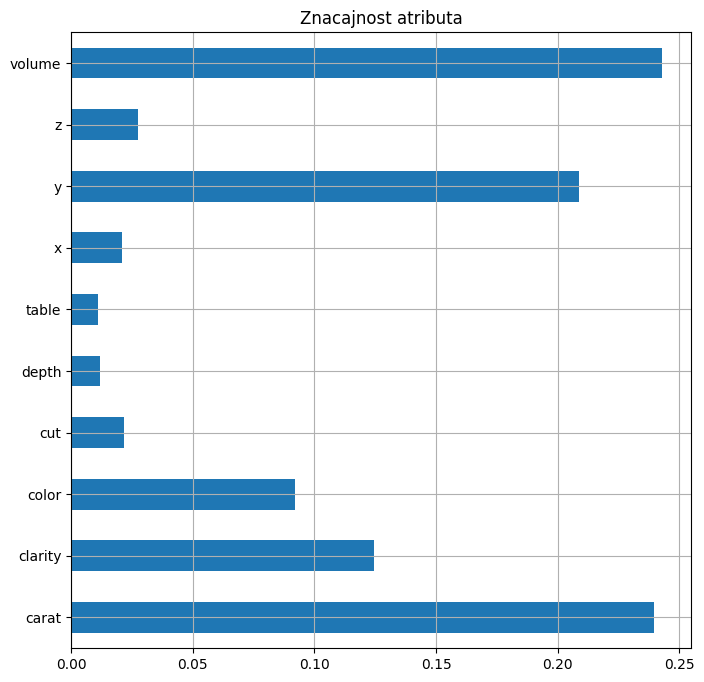

In [16]:
feature_importance(xgb)

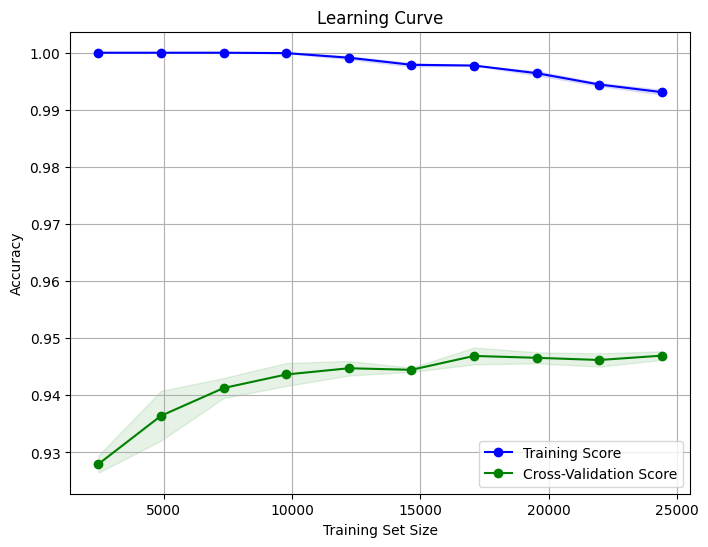

In [17]:
plot_learning_curve(xgb, X_train, y_train)

#### Hyperparameter tuning

In [18]:
params = {
    'model__n_estimators' : [1000, 1200],
    'model__learning_rate' : [0.01, 0.05],
}

In [19]:
grid = GridSearchCV(xgb, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [20]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END model__learning_rate=0.01, model__n_estimators=1000;, score=0.950 total time= 1.5min
[CV 2/3] END model__learning_rate=0.01, model__n_estimators=1000;, score=0.952 total time= 1.5min
[CV 3/3] END model__learning_rate=0.01, model__n_estimators=1000;, score=0.948 total time= 1.5min
[CV 1/3] END model__learning_rate=0.01, model__n_estimators=1200;, score=0.950 total time= 1.8min
[CV 2/3] END model__learning_rate=0.01, model__n_estimators=1200;, score=0.952 total time= 1.8min
[CV 3/3] END model__learning_rate=0.01, model__n_estimators=1200;, score=0.948 total time= 1.8min
[CV 1/3] END model__learning_rate=0.05, model__n_estimators=1000;, score=0.947 total time= 1.5min
[CV 2/3] END model__learning_rate=0.05, model__n_estimators=1000;, score=0.948 total time= 1.5min
[CV 3/3] END model__learning_rate=0.05, model__n_estimators=1000;, score=0.946 total time= 1.5min
[CV 1/3] END model__learning_rate=0.05, model__n_estimator

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob',
                                                      predictor=None, ...))]),
             param_grid={'model__learning_rate': [0.01, 0.05],
                         'model__n_estimators': [1000, 1200]},
             scoring='accuracy', verbose=4)

In [21]:
grid.best_params_

{'model__learning_rate': 0.01, 'model__n_estimators': 1200}

In [22]:
xgb_cv = grid.best_estimator_

Izvestaj o XGBClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9536276195936046
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.83      0.83      0.83      1018
 (5000, 10000]       0.89      0.90      0.90      2802
        15000+       0.82      0.85      0.83       409
     [0, 5000]       0.98      0.98      0.98     11470

      accuracy                           0.95     15699
     macro avg       0.88      0.89      0.89     15699
  weighted avg       0.95      0.95      0.95     15699

-------------------------------------------------------------------
Matrica konfuzije: 


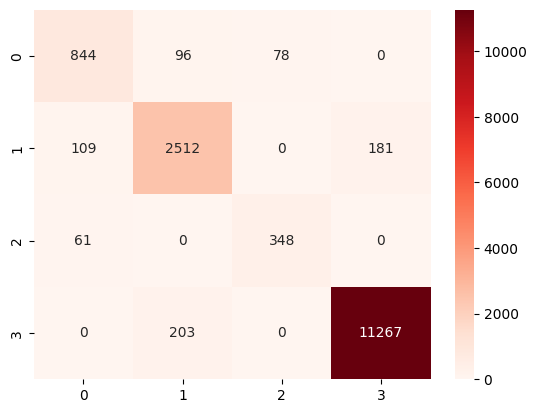

In [23]:
model_report(xgb_cv, X_test, y_test)

carat : 0.24265289306640625
clarity : 0.08011181652545929
color : 0.060131434351205826
cut : 0.014681748114526272
depth : 0.008408324792981148
table : 0.007616718299686909
x : 0.02248223125934601
y : 0.2341085821390152
z : 0.026129310950636864
volume : 0.30367693305015564


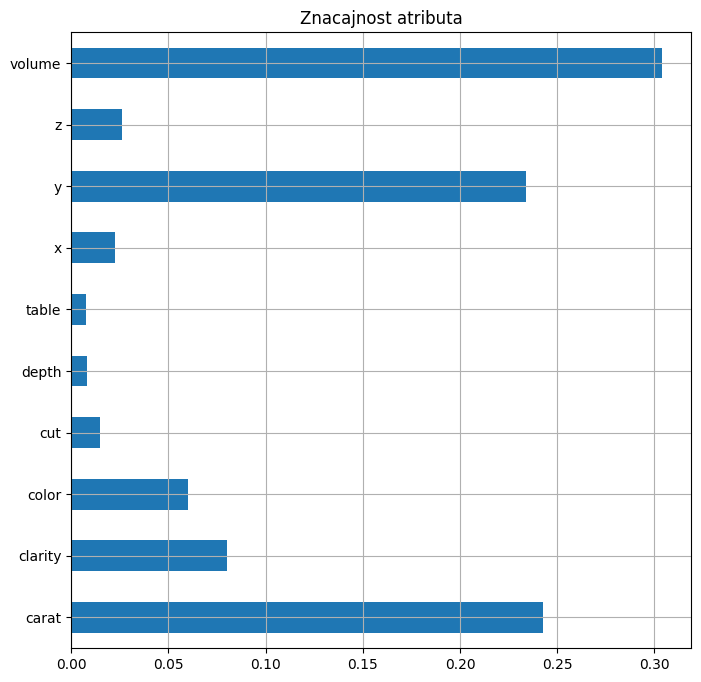

In [24]:
feature_importance(xgb_cv)

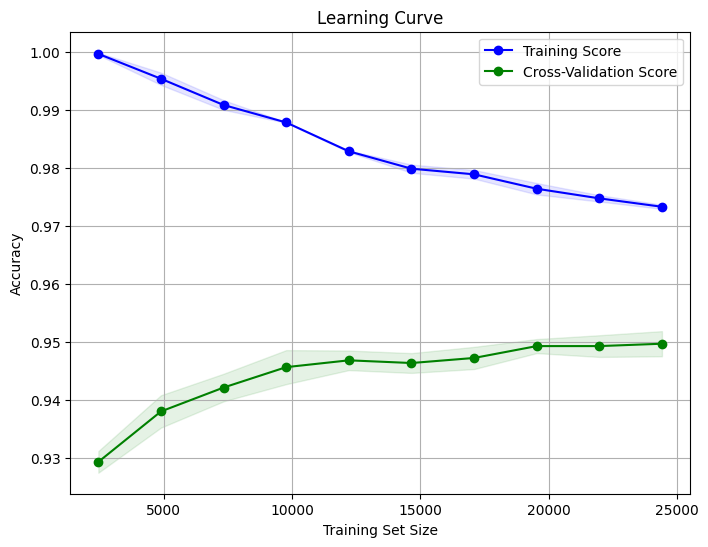

In [25]:
plot_learning_curve(xgb_cv, X_train, y_train)

***

### Now with PCA

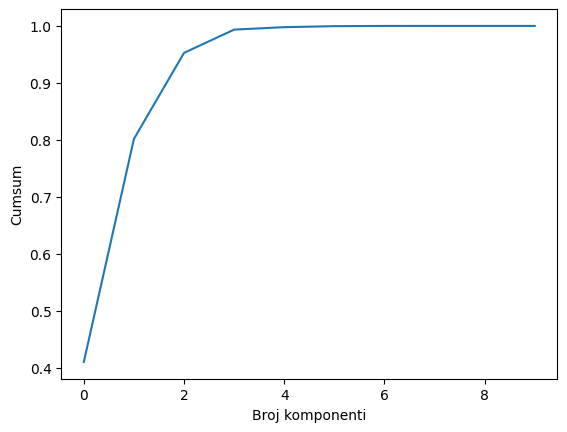

In [26]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Broj komponenti')
plt.ylabel('Cumsum')
plt.show()

In [30]:
xgb_pca = Pipeline([
    ('pca', PCA()),
    ('model', XGBClassifier(random_state = 42) )
])

In [31]:
params = {
    'pca__n_components' : [2, 3, 4],
    'model__n_estimators' : [1000, 1200],
    'model__learning_rate' : [0.01, 0.05]
}

In [32]:
grid = GridSearchCV(xgb_pca, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [33]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END model__learning_rate=0.01, model__n_estimators=1000, pca__n_components=2;, score=0.845 total time= 1.1min
[CV 2/3] END model__learning_rate=0.01, model__n_estimators=1000, pca__n_components=2;, score=0.889 total time= 1.1min
[CV 3/3] END model__learning_rate=0.01, model__n_estimators=1000, pca__n_components=2;, score=0.863 total time= 1.1min
[CV 1/3] END model__learning_rate=0.01, model__n_estimators=1000, pca__n_components=3;, score=0.854 total time= 1.7min
[CV 2/3] END model__learning_rate=0.01, model__n_estimators=1000, pca__n_components=3;, score=0.890 total time= 1.7min
[CV 3/3] END model__learning_rate=0.01, model__n_estimators=1000, pca__n_components=3;, score=0.863 total time= 1.7min
[CV 1/3] END model__learning_rate=0.01, model__n_estimators=1000, pca__n_components=4;, score=0.947 total time= 1.5min
[CV 2/3] END model__learning_rate=0.01, model__n_estimators=1000, pca__n_components=4;, score=0.950 total 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interacti...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42, ...))]),
             param_grid={'model__learning_rate': [0.01, 0.05],
                         'model__n_estimators': [1000, 1200],
                         'pca__n_components': [2, 3, 4]},
             scoring='accuracy', verbose=4)

In [34]:
grid.best_params_

{'model__learning_rate': 0.01,
 'model__n_estimators': 1200,
 'pca__n_components': 4}

In [35]:
xgb_pca_cv = grid.best_estimator_

Izvestaj o XGBClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9513344799031785
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.83      0.82      0.83      1018
 (5000, 10000]       0.89      0.89      0.89      2802
        15000+       0.80      0.85      0.82       409
     [0, 5000]       0.98      0.98      0.98     11470

      accuracy                           0.95     15699
     macro avg       0.87      0.89      0.88     15699
  weighted avg       0.95      0.95      0.95     15699

-------------------------------------------------------------------
Matrica konfuzije: 


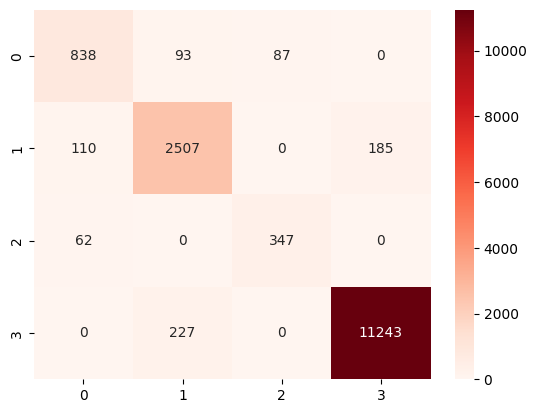

In [36]:
model_report(xgb_pca_cv, X_test, y_test)

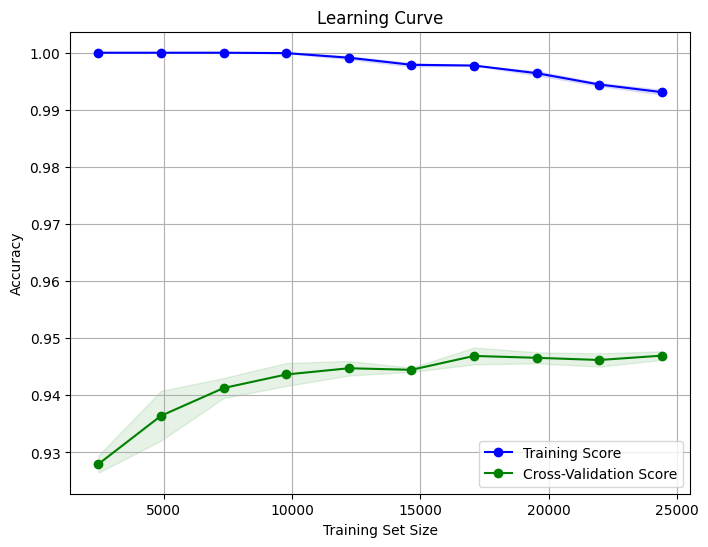

In [37]:
plot_learning_curve(xgb, X_train, y_train)

***

## Results:

In [38]:
model_names = ['xgb', 'xgb_cv', 'xgb_pca_cv']

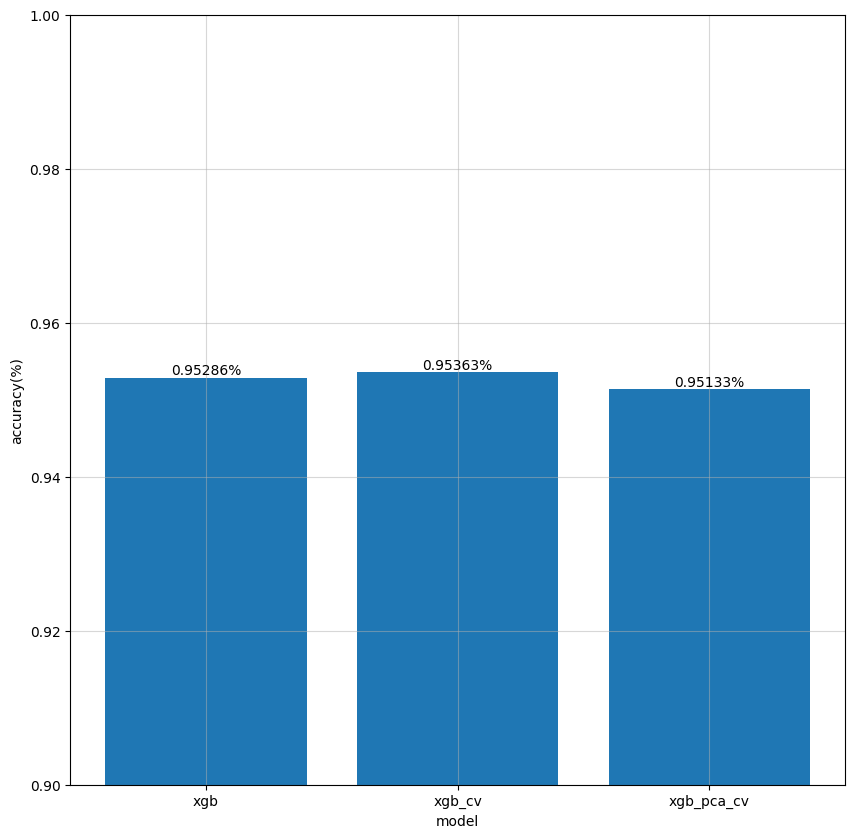

In [39]:
plt.figure(figsize=(10,10))
plt.bar(model_names, accuracy_scores)
plt.grid(alpha=0.5)
plt.ylim(0.9, 1.0)
for i, s in enumerate(accuracy_scores):
    plt.text(model_names[i], s, f'{s:.5f}%', ha='center', va='bottom')
plt.xlabel('model')
plt.ylabel('accuracy(%)')
plt.show()

S obzirom na rezultate, izabracemo **xgb_cv** kao predstavnika **XGBClassifier**

In [41]:
joblib.dump(xgb_cv, 'XGB.pkl')

['XGB.pkl']